# Given an Arb. Function Fit, obtian parameters, Check $Chi^2$

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
import scipy.optimize
import scipy.stats as stat

# Define an Arb Function 
> Lorentzian Function is a known one, so we'll use it 

In [5]:
# Define our model fucntion 
#   how about a Lorentzian function? If you don't know what it is: no problem. It is a "bell_curve" function that's
#   different from a Gaussian one.
def Lorenfunc(x, A,B): 
    ''' f(x) = A/(B+x^2)'''
    return A/(B+x*x)

# Generate Arb Data

In [6]:
#Define the number of data points (would be values we found experimentally)
n_data = 10

#Linspace generates an array of n_data evenly spaced values from -10 to 10 
#np.linspace(start,stop, #of data points)
xdata = np.linspace(-10,10,n_data)
# between (-10,10) generate 10 evenly spaced values

# Pass the data into our function 

In [19]:
# We are assigning (A,B) =(10,4)
#   Presumably these values would be the values we meausered in the lab 
#   with some degree of error 
nominaly = Lorenfunc(xdata, 10, 4)
#        "theoretical line shape"

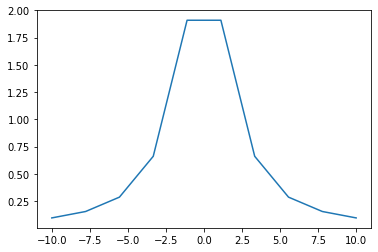

In [20]:
# just to see what it looks like, Change (A,B) to see what the graph can change into

plt.plot(xdata, nominaly)

# Include some Error
> We would normall assign error in lab 

In [62]:
# Assigned error from measuring, each meaused value has this error
noise_std = 0.1

In [66]:
#fill a n_data value sized array with the standard deviation of our noise
error= noise_std*np.ones(n_data)
print("The error associated with each meausred value: ")
print(error)

The error associated with each meausred value: 
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]


# Take our line `nominaly` and make it more realistic: Add Noise 

In [63]:
# An array of all our std(errors) per data point 
#   random.randn is a specific function that will likely not be used again
#   returns values from he "Standard Normal Distribution"
#   Argument gives dimension, this will be an array of length(n_data)


noise = noise_std*np.random.randn(n_data)


print("Every time this block is run the .random.randn will give a new array for Noise array.")
print(f' See this number changes: {np.random.randn(3)}')

Every time this block is run the .random.randn will give a new array for Noise array.
 See this number changes: [ 0.63787412 -2.62956475  0.00826801]


In [64]:
noisyline= noise + nominaly

In [55]:
#Testing cell
print(len(noise))
print(np.random.randn(1,3))
print(noise)


# np.random.randn(n_data) gives us an array of n_data random numbers drawn from a Gaussian
#   distribution with average=0 and standard deviation=1. If we want some other mu and sigma,
#   we can do "sigma * np.random.randn(n_data) + mu"
#   we will add this to our theoretical line to simulate an "experimental signal"

10
[[-2.39535965  1.23766501 -0.10094166]]
[ 0.01988463 -0.09201665 -0.01240311  0.01800084 -0.00959899 -0.08636881
  0.06410268 -0.12620185  0.12580018 -0.19022836]


# Check Values

In [70]:
print(f"Our Output Data (y-values) of length {len(noisyline)}: ")
print(noisyline)
print(f"\nOur Error associated with each measure of lenghth {len(error)}:")
print(error)
print(f"\nOur xvalue data of length {len(xdata)}:")
print(xdata)

Our Output Data (y-values) of length 10: 
[0.02758984 0.19163885 0.29041311 0.53526392 2.03514106 1.82590661
 0.66381345 0.13309206 0.20054187 0.07157201]

Our Error associated with each measure of lenghth 10:
[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]

Our xvalue data of length 10:
[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]


# Fit the Values using a package

In [ ]:
# READ DOCUMENTATION here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
#   The goal is to understand the meaning of the above pararmeters of the function and to understand what 
#   the function calulates as its output.
#           Absolute_sigma=True is SUPER important. If you don't do that, the covariance matrix that contains the 
#           uncertainties of the fitted pararemetrs will be WRONG!
#
# IMPORTANT: in your report you have to state explicitely which function 
#               you used to do the fit (even if it is not this one).

In [71]:
parms, covariance = scipy.optimize.curve_fit(Lorenfunc,
                xdata,
                noisyline,
                sigma=error,
                p0=None,
                absolute_sigma=True)

In [72]:
# print out our values
#   This is in order 0 = A and 1 = B
for i in range(0,len(parms)):
    print('param ',i,' = ',parms[i], '+/-', np.sqrt(covariance[i,i]))

param  0  =  8.45294616481085 +/- 1.2321140473438463
param  1  =  3.14344633609909 +/- 0.671492386445578


In [73]:
# Create a fitted line with the new parameters the function generated 
fitline= Lorenfunc(xdata, *parms)


# Note:
#   * is used in front of parms to let python know that we use an array 
#   to relay LorenLine parameters instead of doing in one by one: A,B

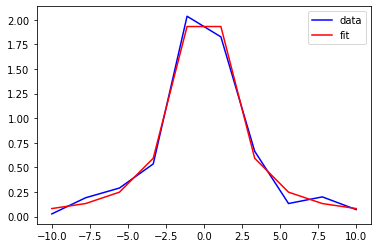

In [76]:
# Check what it looks like 
plt.plot(xdata, noisyline, 'b', label= "data")
plt.plot(xdata, fitline, 'r', label= 'fit')
plt.legend()

# Now Examine $Chi^2$

In [85]:
# By definition: 
chisq = sum( (noisyline - fitline)**2 / error**2 )

# ndf = number of degrees of freedom
ndf = len(xdata)-len(parms)

# prof advised not to use this 
chisq_reduced = chisq/float(ndf)

#   Note:
#       The reduced Chi2 = (Chi2/ndf) is just a "shortcut" that allows us to quickly decide if 
#       the data agrees with the model.
#     If reduced Chi2 is about equal to one: we are definitely good, because (Chi2/ndf)=1 corresponds to 
#     the p-value of 0.5

cdf = stat.chi2.cdf(chisq, df = ndf)

# For a Chisquare with a given number of degrees of freedom the p-test value: 
#       is just one minus the cummilative distribtion 
#       fucntion (CDF) of the chisquare probabilty distribution evaluated at the calculated value of ChiSq
pvalue = 1-cdf

print('Chi-square: ',chisq)
print('Degrees of freedom: ',ndf)
print('Reduced chi-square: ',chisq_reduced)
print('CDF: ', cdf)
print('p-test value (not 2tail bc this is not Gausian/symmentric) : ',pvalue)
print('\nDO NOT FORGET: This e.g. is useing .random.randn \n thus after each refresh the values will change.')


Chi-square:  5.6428722119751376
Degrees of freedom:  8
Reduced chi-square:  0.7053590264968922
CDF:  0.31283526628348196
p-test value (not 2tail bc this is not Gausian/symmentric) :  0.6871647337165181

DO NOT FORGET: This e.g. is useing .random.randn 
 thus after each refresh the values will change.


In [ ]:
# Importantly, you can have (Chi2/ndf) significantly larger than one and still have p-value > 0.05.
#   Example:
#       Chi-square = 14.58514088020246; degrees of freedom = 8; reduced Chi-square = 1.8231426100253074
#       p-test value :  0.067732169890656

# CONCLUSION: 
#       Always calculate p-value using Chi2 and ndf

# Final plots

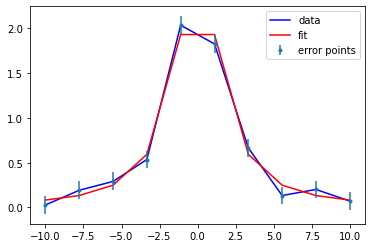

In [88]:
# Same plots as b4
plt.plot(xdata, noisyline, 'b', label= "data")
plt.plot(xdata, fitline, 'r', label= 'fit')
# Add error bars 
plt.errorbar(xdata,noisyline,yerr=error,fmt='.',ls=None, label='error points')
plt.legend()

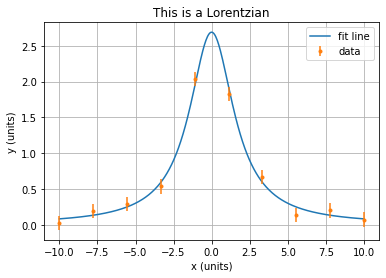

In [89]:
#   Make it look nicer: 
#   by adding more points to the fitted line 
#   the specific data points wil still show up but now it wil be smooth

# Increase the # of points & use the parameters from our curve_fit
xdata_plot = np.linspace(-10,10,400)
fitline_plot= Lorenfunc(xdata_plot, *parms)


# Plot the new pretty line
plt.plot(xdata_plot, fitline_plot,label="fit line")
# Plot the standard error (this will show the data points)
plt.errorbar(xdata,noisyline,yerr=error,fmt='.',ls=None, label='data')


# Make it puuurty
plt.title('This is a Lorentzian')
plt.grid()
plt.legend()
plot_xlabel = 'x (units)'
plot_ylabel = 'y (units)'
plt.xlabel(plot_xlabel)
plt.ylabel(plot_ylabel)
plt.show()
